## Explorando Patrones y Relaciones en un Dataset de Películas:<br>  Un Análisis Exploratorio de Datos (EDA)

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import ydata_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


Primero, cargamos el conjunto de datos y echamos un vistazo a las primeras filas:

In [3]:
df = pd.read_csv('https://storage.googleapis.com/pimlopsenz/dataset/processed_movies_dataset.csv')
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,release_date,revenue,...,tagline,title,vote_average,country,collection_id,collection_name,companies_id,companies_name,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,...,NaN,Toy Story,7.7,United States of America,10194.0,Toy Story Collection,[3],['Pixar Animation Studios'],1995,12.451801
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,6.9,United States of America,NaN,NaN,"[559, 2550, 10201]","['TriStar Pictures', 'Teitler Film', 'Intersco...",1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,United States of America,119050.0,Grumpy Old Men Collection,"[6194, 19464]","['Warner Bros.', 'Lancaster Gate']",1995,0.000000
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,...,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,United States of America,NaN,NaN,[306],['Twentieth Century Fox Film Corporation'],1995,5.090760
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,United States of America,96871.0,Father of the Bride Collection,"[5842, 9195]","['Sandollar Productions', 'Touchstone Pictures']",1995,inf


Después, verificamos estadísticas descriptivas básicas. 
Esto nos dará estadísticas como media, desviación estándar, mínimo, máximo, y los percentiles para las columnas numéricas, y también información como el número de elementos únicos, la moda, y la frecuencia de la moda para las columnas de texto.

In [19]:
df.describe(include='all')

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,release_date,revenue,...,tagline,title,vote_average,country,collection_id,collection_name,companies_id,companies_name,release_year,return
count,4491,4.537900e+04,45379,45379,45368,44438,45376.000000,45379,45376,4.537900e+04,...,20398,45376,45376.000000,39160,4488.000000,4488,45379,45379,45379.000000,45379.0
unique,1698,NaN,4068,45349,92,44233,NaN,22704,17333,NaN,...,20269,42196,NaN,141,NaN,1695,22703,22668,NaN,NaN
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",NaN,"[{'id': 18, 'name': 'Drama'}]",141971,en,No overview found.,NaN,[],2008-01-01,NaN,...,Based on a true story.,Cinderella,NaN,United States of America,NaN,The Bowery Boys,[],[],NaN,NaN
freq,29,NaN,4998,3,32202,133,NaN,11796,136,NaN,...,7,11,NaN,18420,NaN,29,11799,11799,NaN,NaN
mean,NaN,4.232325e+06,NaN,NaN,NaN,NaN,2.926458,NaN,NaN,1.122936e+07,...,NaN,NaN,5.624070,NaN,184073.408868,NaN,NaN,NaN,1991.749510,inf
std,NaN,1.743932e+07,NaN,NaN,NaN,NaN,6.009672,NaN,NaN,6.438789e+07,...,NaN,NaN,1.915423,NaN,141630.530505,NaN,NaN,NaN,28.998404,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,...,NaN,NaN,0.000000,NaN,10.000000,NaN,NaN,NaN,0.000000,0.0
25%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.388840,NaN,NaN,0.000000e+00,...,NaN,NaN,5.000000,NaN,86026.250000,NaN,NaN,NaN,1978.000000,0.0
50%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.130454,NaN,NaN,0.000000e+00,...,NaN,NaN,6.000000,NaN,141531.500000,NaN,NaN,NaN,2001.000000,0.0
75%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,3.691695,NaN,NaN,0.000000e+00,...,NaN,NaN,6.800000,NaN,294172.000000,NaN,NaN,NaN,2010.000000,0.0


Para visualizar los datos perdidos, podemos usar la biblioteca missingno, generando una matriz en blanco y negro que muestra dónde faltan los datos.


<AxesSubplot:>

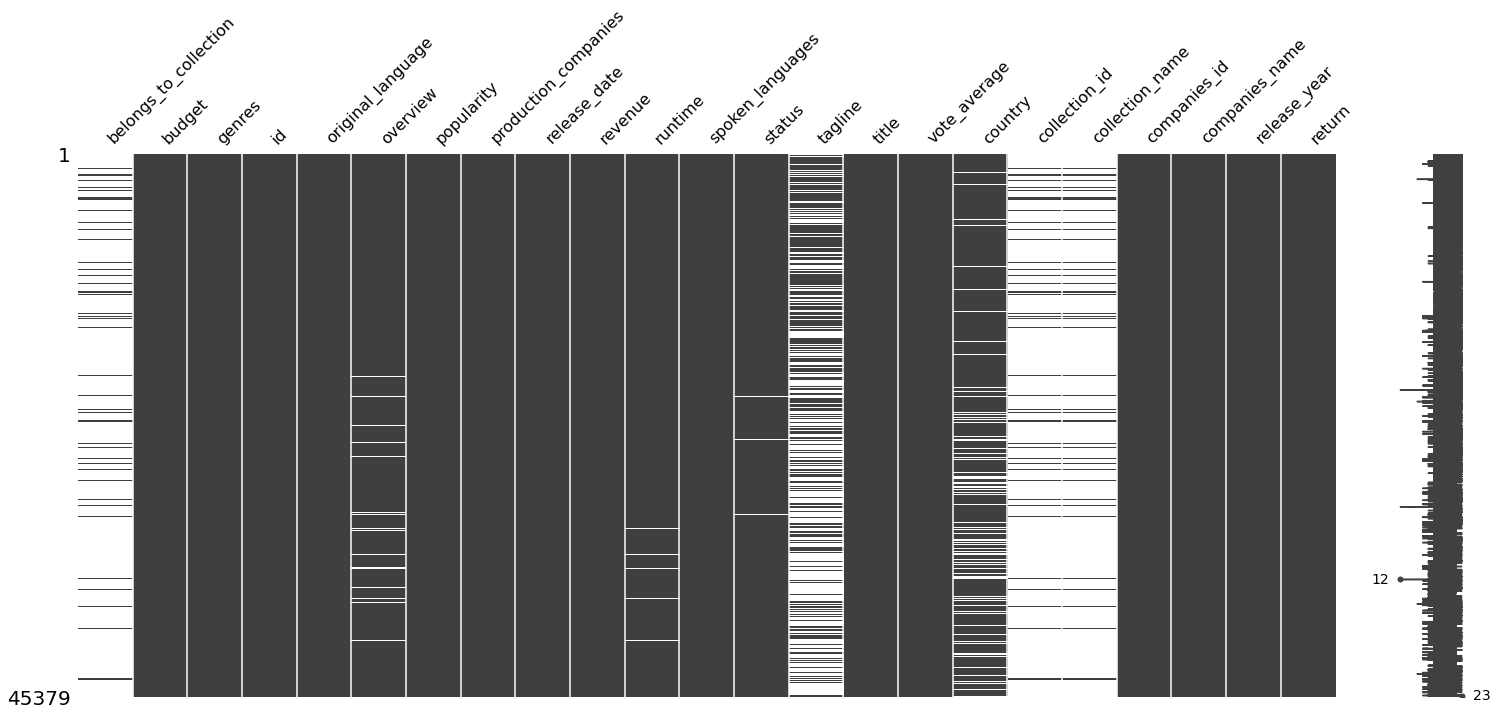

In [20]:
msno.matrix(df)

Para un análisis más completo, podemos usar la librería pandas_profiling que crea un informe HTML interactivo con mucha información sobre los datos:

In [21]:
# Reemplaza los valores infinitos por NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Reemplazar los NaN con un valor específico, como 0:
df = df.fillna(0)

# Eliminar las filas o columnas que contienen NaN:
df = df.dropna()  # elimina las filas
df = df.dropna(axis=1)  # elimina las columnas

In [22]:
profile = df.profile_report(title='YData Profiling Report', correlations={"auto": {"calculate": False}})
profile.to_file(output_file="output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Podemos hacer un análisis de correlación para ver qué variables están más relacionadas entre sí. Esto se puede hacer con la función corr() de pandas y luego visualizarla con seaborn:

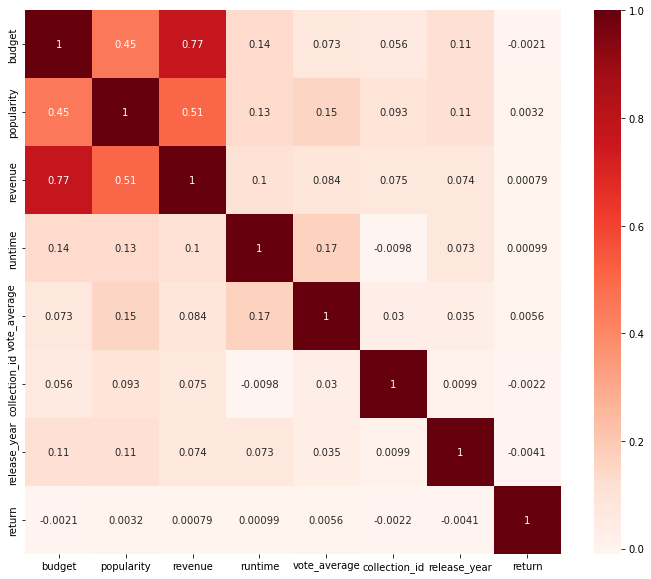

In [23]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Para visualizar la frecuencia de palabras en los títulos, podemos usar una nube de palabras:



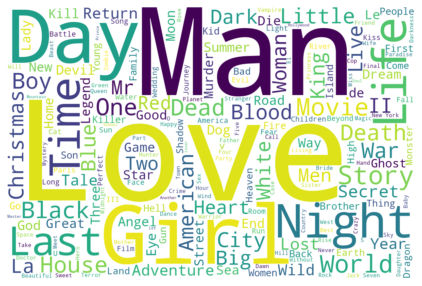

In [24]:
# Convertir todos los elementos de la serie a strings
text = ' '.join(df['title'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=1200, height=800, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Análisis de tendencias temporales: Presupuesto promedio a lo largo del tiempo

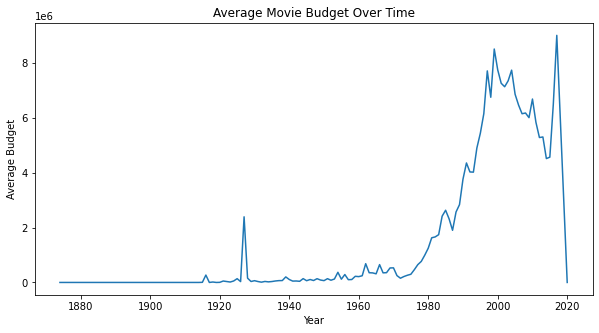

In [25]:
# Asegurar de que la columna de fechas esté en formato de fecha y hora. Si no es así, convertirla utilizando el método to_datetime() de pandas:
df['release_date'] = pd.to_datetime(df['release_date'])

# Agrupar lus datos por año y calcular la media del presupuesto
df['year'] = df['release_date'].dt.year
budget_by_year = df.groupby('year')['budget'].mean()

# Presupuesto promedio a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(budget_by_year)
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Movie Budget Over Time')
plt.show()


Determinar las productoras que producen más películas: 

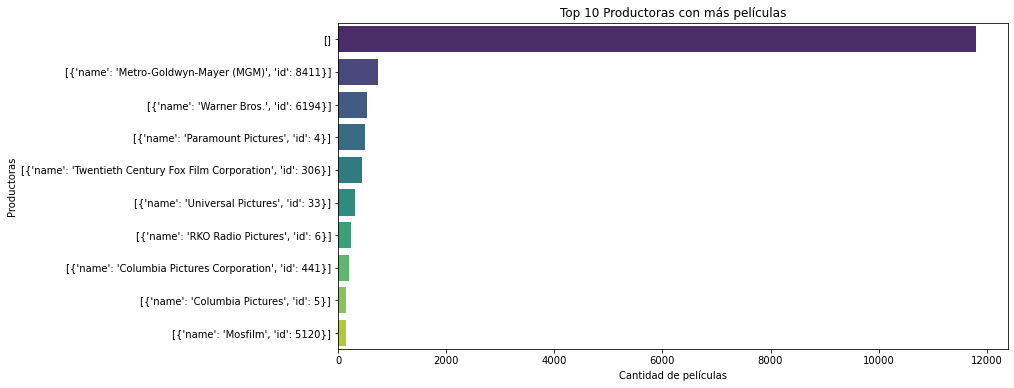

In [26]:
# Agrupar el conjunto de datos por productoras
productoras_peliculas = df.groupby('production_companies')['id'].count().reset_index()

# Ordenar los resultados en orden descendente para ver las productoras con más películas
productoras_peliculas = productoras_peliculas.sort_values('id', ascending=False)

# Visualizar los resultados, por ejemplo, las 10 principales productoras con más películas
top_productoras = productoras_peliculas.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_productoras, y='production_companies', x='id', palette='viridis')
plt.xlabel('Cantidad de películas')
plt.ylabel('Productoras')
plt.title('Top 10 Productoras con más películas')
plt.show()


Encontrar las películas más populares:

In [27]:
# Ordenar el conjunto de datos por la columna de popularidad en orden descendente:
peliculas_populares = df.sort_values('popularity', ascending=False)

# Mostrar las primeras películas en la lista, por ejemplo, las 10 películas más populares:
top_peliculas_populares = peliculas_populares.head(10) # ajustar el número de películas principales mostradas cambiando el valor en head(n), donde n es el número deseado de películas.
print(top_peliculas_populares[['title', 'popularity']])


                                title  popularity
30667                         Minions  547.488298
33318                    Wonder Woman  294.337037
42154            Beauty and the Beast  287.253654
43570                     Baby Driver  228.032744
24427                      Big Hero 6  213.849907
26535                        Deadpool  187.860492
26537  Guardians of the Galaxy Vol. 2  185.330992
14545                          Avatar  185.070892
24323                       John Wick  183.870374
23649                       Gone Girl  154.801009
